In [3]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# importing data
df = pd.read_csv("../data/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


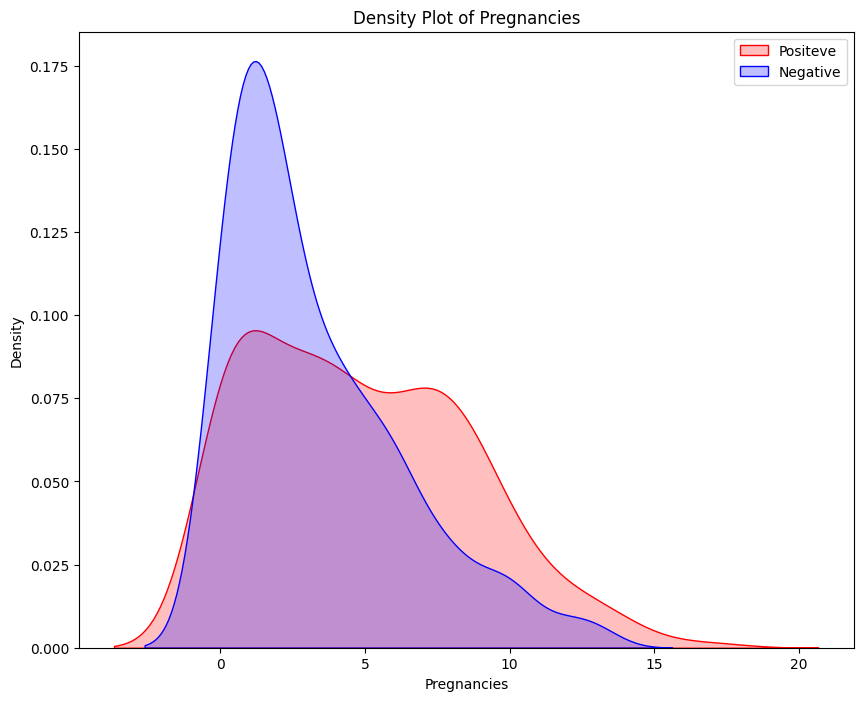

In [8]:
# Exploring Pregnancies	and target variable
plt.figure(figsize = (10 , 8))

# Density Plot
kde_plot = sns.kdeplot(df["Pregnancies"][(df["Outcome"] == 1)] , fill = True , color = "Red")
kde_plot = sns.kdeplot(df["Pregnancies"][(df["Outcome"] == 0)] , fill = True , color = "Blue")
kde_plot.set_title("Density Plot of Pregnancies")
kde_plot.set_xlabel("Pregnancies")
kde_plot.set_ylabel("Density")
kde_plot.legend(["Positeve" , "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

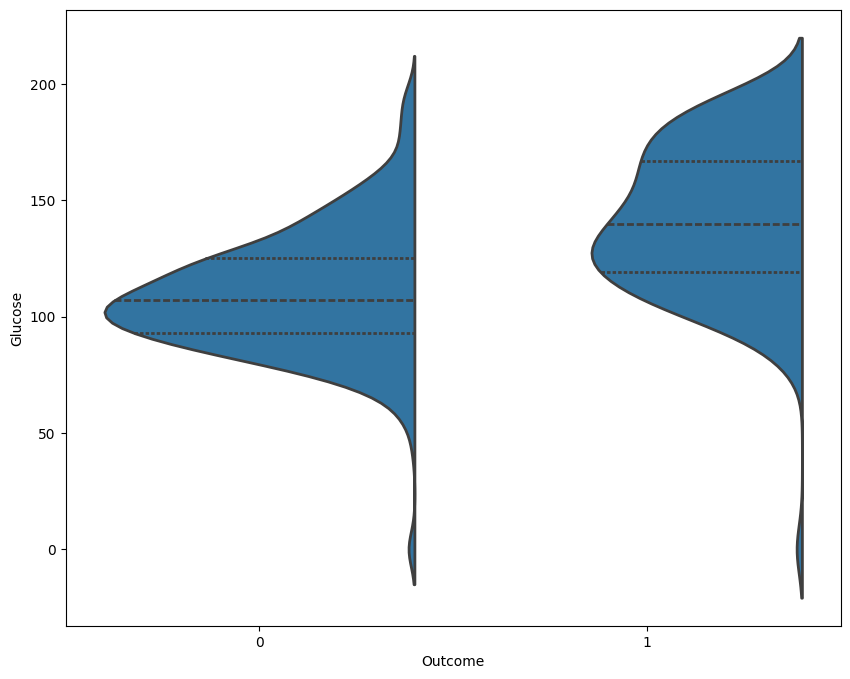

In [9]:
# Exploring Glucose and Target variable 
plt.figure(figsize = (10 , 8))
sns.violinplot(data = df , x = df["Outcome"] , y = df["Glucose"] , split = True , linewidth = 2 , inner = "quartile" )

### Replacing 0 values with the mean/median of the respective features 

In [10]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in columns:
    print( "\n", col , df[col][(df[col] == 0)].count())


 Glucose 5

 BloodPressure 35

 SkinThickness 227

 Insulin 374

 BMI 11


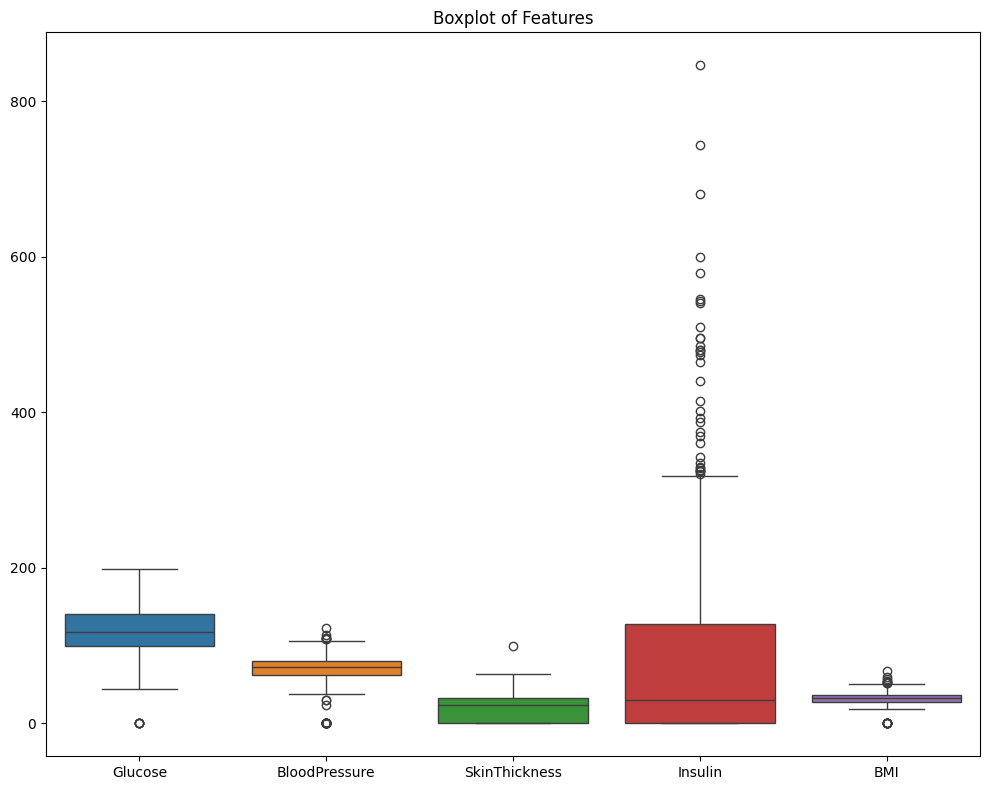

In [11]:
# Boxploting Features
plt.figure(figsize = (10 , 8))
sns.boxplot(data = df[columns])
plt.title("Boxplot of Features")
plt.tight_layout()
plt.show()

In [12]:
# replacing
df["Glucose"] = df["Glucose"].replace(0 , df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].replace(0 , df["BloodPressure"].median())
df["SkinThickness"] = df["SkinThickness"].replace(0 , df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].replace(0 , df["Insulin"].median())
df["BMI"] = df["BMI"].replace(0 , df["BMI"].mean())


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


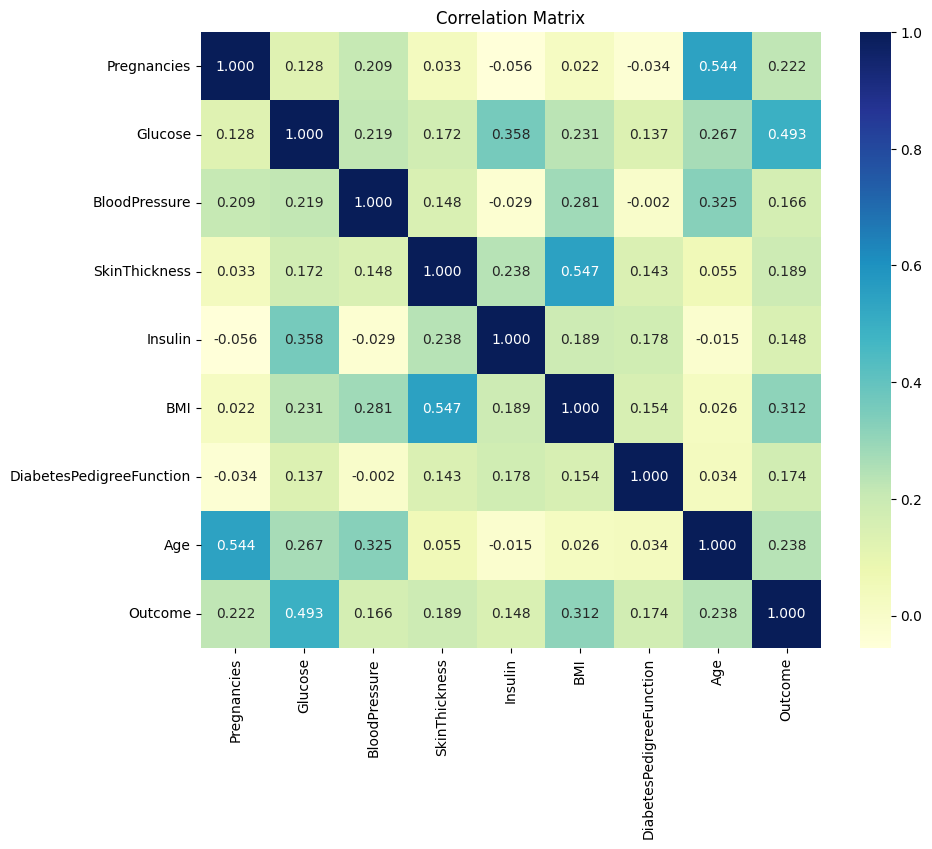

In [14]:
# correlation matrix
plt.figure(figsize = (10 , 8))
sns.heatmap(df.corr() , annot = True , fmt = ".3f" , cmap = "YlGnBu")
plt.title("Correlation Matrix")
plt.show()

## Model

In [15]:
# Taking Target & Other Features
X = df.drop("Outcome" , axis = 1)
y = df["Outcome"]
X , y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35     30.5  33.6   
 1              1       85             66             29     30.5  26.6   
 2              8      183             64             23     30.5  23.3   
 3              1       89             66             23     94.0  28.1   
 4              0      137             40             35    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48    180.0  32.9   
 764            2      122             70             27     30.5  36.8   
 765            5      121             72             23    112.0  26.2   
 766            1      126             60             23     30.5  30.1   
 767            1       93             70             31     30.5  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [16]:
# splitting data
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.33 , random_state = 42 )

In [17]:
# shapes
print("Shape" , X.shape)
print("Shape" , X_train.shape)
print("Shape", X_test.shape)
print("Shape" , y.shape)
print("Shape" , y_train.shape)
print("Shape" , y_test.shape)

Shape (768, 8)
Shape (514, 8)
Shape (254, 8)
Shape (768,)
Shape (514,)
Shape (254,)


#### KNN : Classifier Model 

In [18]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

for n in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train , y_train)
    
    # training accuracy
    training_accuracy.append(knn.score(X_train , y_train))
    # testing accuracy
    test_accuracy.append(knn.score(X_test , y_test))

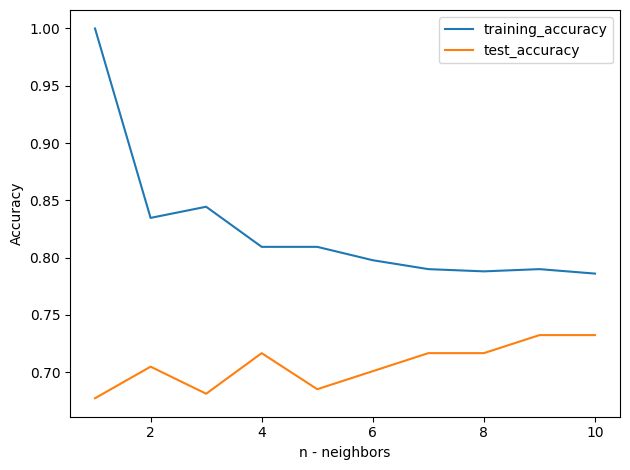

In [19]:
plt.plot(range(1,11) , training_accuracy , label= "training_accuracy")
plt.plot(range(1,11) , test_accuracy , label = "test_accuracy")
plt.xlabel("n - neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# neighborn choosen
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train , y_train)
train_accuracy = knn.score(X_train,y_train)
test_accuracy = knn.score(X_test , y_test)
print("Training Accuracy :" ,train_accuracy )
print("Test Accuracy :" ,test_accuracy )

Training Accuracy : 0.7898832684824902
Test Accuracy : 0.7322834645669292


#### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train , y_train)


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn import metrics

y_pred = model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test , y_pred)
print("Accuracy Score : " , accuracy_score)

Accuracy Score :  0.7559055118110236


#### Descision Tree model

In [23]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth = 3)
model_dt.fit(X_train , y_train)

accuracy_score = model_dt.score(X_test , y_test)
print("Train Accuracy Score : " , model_dt.score(X_train , y_train))
print("Test Accuracy Score : " , accuracy_score)

Train Accuracy Score :  0.3956576951647829
Test Accuracy Score :  0.1289004824323483


#### Multi-Layer Perceptron Classifier

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train_scaled , y_train)
y_pred = mlp.predict(X_test_scaled)
print("Accuracy Score" , metrics.accuracy_score(y_test , y_pred))

c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score 0.7362204724409449
